# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

The **business objective** of this project is to improve TikTok’s content moderation efficiency by developing a tool that can automatically identify whether a video contains a claim or expresses an opinion. This will help reduce the growing backlog of user reports and allow moderators to prioritize videos that may require fact-checking or further investigation. A key premise behind this project is that **users may unintentionally or intentionally post content that includes false or misleading claims**, which can contribute to the spread of misinformation and potentially violate TikTok’s community guidelines. The **modeling objective** is to build a binary classification machine learning model that predicts whether a video presents a “claim” or an “opinion.” The model will use labeled data and relevant features from TikTok videos, and its performance will be evaluated using classification metrics such as F1 score, precision, and recall. A successful model will support faster, more accurate content moderation and help TikTok maintain a safe, trustworthy, and well-regulated platform.

To evaluate the success of the business and organizational objective—automating the identification of claims in TikTok videos to improve content moderation efficiency—I will use metrics that reflect both accuracy and fairness in binary classification.

Since the task is to classify videos from the claim_status as either "claim" or "opinion", and because misclassification of claims (false positives or false negatives) can have serious implications, the most appropriate evaluation metrics are:

Primary Metric: F1 Score
The F1 Score balances precision (how many predicted claims are actually claims) and recall (how many actual claims were correctly identified).

It is especially useful when there is class imbalance, which is common in moderation tasks (e.g., more opinions than claims).

Why it's important: It ensures the model is not just accurate, but also fair and reliable in both detecting real claims and avoiding false flags.

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**

Considering the greater risk associated with false negatives—where the model fails to detect a video that actually contains a claim—these errors can result in potential violations of TikTok’s Terms of Service going unnoticed. This could lead to the spread of misinformation, harm to the community, and a failure to uphold platform integrity. Since these unflagged claims may not be reviewed by moderators, they pose a serious threat to user safety and trust.

Given this priority, the most appropriate model evaluation metric is **recall**. Recall measures the proportion of actual claims that the model correctly identifies. A high recall means the model is effective at catching as many true claims as possible, which is essential when the cost of missing a violative claim is high. While other metrics like F1 score and precision are also important, recall should be the primary focus in this case to minimize the risk of harmful content slipping through.

  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

False Negative (model predicts “opinion” but it’s actually a “claim”):
    This may allow violations of TikTok’s terms of service, such as the spread of false or misleading claims, to go unnoticed.

Harmful content could remain visible, potentially impacting public safety, health, or trust in the platform.

Failing to flag violative content undermines the goal of protecting users and enforcing platform policies.

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

False Positive (model predicts “claim” but it’s actually an “opinion”):
This could result in non-violating content being incorrectly flagged, leading to unjustified content removal or demotion.

It may discourage users from sharing opinions or engaging in discussions, raising concerns around over-moderation and platform fairness.

Misuse or overreach of moderation could damage TikTok’s credibility and user trust.

3.   **How would you proceed?**


To proceed with building the model, I would focus on **data cleaning** and **feature engineering** to prepare the dataset, then prioritize **recall** as the primary evaluation metric to minimize **false negatives** (missed claims). I’d tune the model to ensure it maximizes recall, even if it slightly compromises precision. After training, I would evaluate performance using **cross-validation** and adjust the **classification threshold** to further optimize recall. Continuous monitoring and feedback from human moderators would ensure the model remains accurate and ethically sound as it is deployed.

**Modeling workflow and model selection process**

Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:

1. Split the data into train/validation/test sets (60/20/20)
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)


### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Import packages for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Import XGBoost
import xgboost as xgb

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get the number of rows and columns in the dataset
data_shape = data.shape
print(f"Number of rows: {data_shape[0]}")
print(f"Number of columns: {data_shape[1]}")

Number of rows: 19382
Number of columns: 12


Get the data types of the columns.

In [5]:
# Display column names with their data types
print(data.dtypes)

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object


Get basic information about the dataset.

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64


In [9]:
# Drop rows with missing values
data = data.dropna()

In [10]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
duplicate_rows = data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


Check for and handle outliers.

Since the model is robust to outliers, you don't need to remove them.

Check class balance.

In [12]:
# Check class counts
print("Class counts:")
print(data['claim_status'].value_counts())

# Check class balance as percentages
print("\nClass balance (percentage):")
print(data['claim_status'].value_counts(normalize=True) * 100)

Class counts:
claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

Class balance (percentage):
claim_status
claim      50.345839
opinion    49.654161
Name: proportion, dtype: float64


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [13]:
# Add a new column to the dataframe with the length of each video_transcription_text
data['video_transcription_text_length'] = data['video_transcription_text'].apply(len)

# Display the first few rows to confirm the new column has been added
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calculate the average text_length for claims and opinions.

In [14]:
# Group the data by 'claim_status' and calculate the average 'video_transcription_text_length'
average_text_length = data.groupby('claim_status')['video_transcription_text_length'].mean()

# Display the result
average_text_length

claim_status
claim      95.376978
opinion    82.722562
Name: video_transcription_text_length, dtype: float64

Visualize the distribution of `text_length` for claims and opinions.

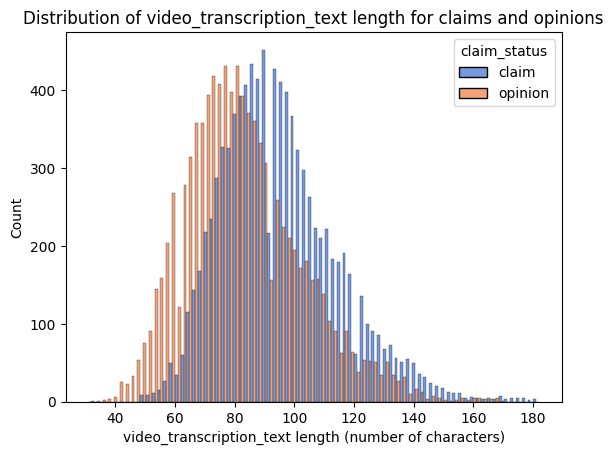

In [15]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

sns.histplot(data=data, stat="count", multiple="dodge", x="video_transcription_text_length",
             kde=False, palette="muted", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

**Feature selection and transformation**

Encode target and catgorical variables.

In [16]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a copy of the feature data (X)
X = data.copy()

# Drop columns that won't be used as features
X = X.drop(columns=["claim_status", "video_id", "video_transcription_text"])

# Encode the target variable (claim_status): claim = 1, opinion = 0
y = data["claim_status"].map({"claim": 1, "opinion": 0})

# Dummy encode remaining categorical variables (e.g., verified_status, author_ban_status)
X = pd.get_dummies(X, columns=["verified_status", "author_ban_status"], drop_first=True)
X.head()

,#,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,2,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,3,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,4,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,5,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Task 4: Split the data**

Assign target variable.

In [17]:
# Assign the target variable
y = data["claim_status"].map({"claim": 1, "opinion": 0})

Isolate the features.

In [18]:
# Drop columns that are not numeric or not yet vectorized
X = data.drop(columns=["#","claim_status", "video_id", "video_transcription_text"])

# Display the first few rows of the features dataframe
X.head()

,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
0,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [20]:
# Split the training set into 75% training and 25% validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0, stratify=y_train)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [21]:
# Get shape of training set
print("Training set:", X_train_final.shape, y_train_final.shape)

# Get shape of validation set
print("Validation set:", X_val.shape, y_val.shape)

# Get shape of test set
print("Test set:", X_test.shape, y_test.shape)

Training set: (11450, 9) (11450,)
Validation set: (3817, 9) (3817,)
Test set: (3817, 9) (3817,)


In [22]:
X.columns

Index(['video_duration_sec', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count',
       'video_transcription_text_length'],
      dtype='object')

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'], drop_first=True)

# Make sure y is still aligned
assert len(X_encoded) == len(y), "Mismatch between X and y lengths!"

# Split features and target together
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 60/20/20

# Define model and parameters
rf = RandomForestClassifier(random_state=0)
cv_params = {
    'max_depth': [5, 7, None],
    'max_features': [0.3, 0.6],
    'max_samples': [0.7],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [75, 100, 200],
}

# Multi-metric scoring
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

# GridSearchCV
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, refit='recall', cv=4, verbose=1, n_jobs=-1)

# ✅ Fit the model using the properly aligned inputs
rf_cv.fit(X_train_final, y_train_final)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'},
             verbose=1)

Check the precision score to make sure the model isn't labeling everything as claims. You can do this by using the `cv_results_` attribute of the fit `GridSearchCV` object, which returns a numpy array that can be converted to a pandas dataframe. Then, examine the `mean_test_precision` column of this dataframe at the index containing the results from the best model. This index can be accessed by using the `best_index_` attribute of the fit `GridSearchCV` object.

In [24]:
# Convert GridSearchCV results to DataFrame
cv_results_df = pd.DataFrame(rf_cv.cv_results_)

# Get precision score at best model index
best_precision = cv_results_df.loc[rf_cv.best_index_, 'mean_test_precision']
print("Best Precision Score (CV):", best_precision)

Best Precision Score (CV): 0.9993050729673384


**Question:** How well is your model performing? Consider average recall score and precision score.

The precision score of ~0.999 suggests the model is extremely precise — almost all positive predictions are correct. This is especially important if false positives are costly. However, we focused model selection on recall, which is often critical when false negatives are more problematic (e.g., missing actual claims).

### **Build an XGBoost model**

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

# 2. Create a dictionary of hyperparameters to tune
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [4, 8, 12],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# 3. Define a list of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# 4. Instantiate the GridSearchCV object (refitting on recall)
xgb_cv = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=scoring,
    refit='recall',  # Refit the model based on the best recall score
    cv=4,
    verbose=1,
    n_jobs=-1
)

# To fit the model later:
# xgb_cv.fit(X_train_final, y_train_final)

In [26]:
# Fit the model to the data
xgb_cv.fit(X_train_final, y_train_final)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


C:\Users\slind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [04:46:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'n_estimators': [300, 500], 'subsample': [0.8, 1]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'},
             verbose=1)

In [27]:
# Examine best recall score
xgb_cv.best_score_

np.float64(0.9901694390899789)

In [28]:
# Examine best parameters
xgb_cv.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 500,
 'subsample': 1}

Repeat the steps used for random forest to examine the precision score of the best model identified in the grid search.

In [29]:
import pandas as pd

# Access the cv results from the fitted XGBoost GridSearchCV
results_df = pd.DataFrame(xgb_cv.cv_results_)

# Get the best index (where recall was highest)
best_index = xgb_cv.best_index_

# Get the corresponding precision score
best_precision = results_df.loc[best_index, 'mean_test_precision']

print("Best Precision Score corresponding to best recall model:", best_precision)

Best Precision Score corresponding to best recall model: 0.9987807203072714


In [30]:
best_recall = results_df.loc[best_index, 'mean_test_recall']
print("Best Recall Score:", best_recall)

Best Recall Score: 0.9901694390899789


**Question:** How well does your model perform? Consider recall score and precision score.

| **Metric**    | **Score**           | **Interpretation**                                                                                                                                           |
| ------------- | ------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Recall**    | **0.9902** (99.02%) | The model correctly identifies **99% of actual claims** (very few false negatives). This is excellent, especially if catching all claims is a high priority. |
| **Precision** | **0.9988** (99.88%) | Almost all positive predictions made by the model are correct — i.e., very few false positives. This is nearly perfect precision.                            |

Interpretation
A recall of 99.02% means the model is missing only about 1 in 100 actual claims. This is critical in scenarios like fraud detection, medical diagnosis, or content moderation — where missing positives is costly.

A precision of 99.88% means that almost every "claim" prediction made by the model is correct. So you're not overwhelming the system (or human reviewers) with false alarms.

Conclusion
Your XGBoost model is extremely well-balanced:

It minimizes false negatives (high recall), catching almost all true claims.

It minimizes false positives (high precision), making reliable predictions.

This kind of performance indicates that your data is well-prepared, the model is appropriately tuned, and XGBoost is a strong fit for your classification task.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [31]:
# Assuming you already have this from before
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [75, 100, 200],
    'max_depth': [5, 7, None],
    'max_features': [0.3, 0.6],
    'max_samples': [0.7],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3]
}

# Define scoring
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

# Create GridSearchCV object
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring, refit='recall', cv=4, n_jobs=-1, verbose=1)

# Fit model to training data
rf_cv.fit(X_train_final, y_train_final)

# Get best estimator
best_rf = rf_cv.best_estimator_


Fitting 4 folds for each of 72 candidates, totalling 288 fits


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on validation set
y_val_pred_rf = best_rf.predict(X_val)

# Evaluation
print("Random Forest Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred_rf))

Random Forest Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1935
           1       1.00      0.99      0.99      1882

    accuracy                           1.00      3817
   macro avg       1.00      0.99      1.00      3817
weighted avg       1.00      1.00      1.00      3817



Display the predictions on the validation set.

In [33]:
# Create a DataFrame to compare predictions with actual values
comparison_df = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_val_pred_rf
})

# Display the first few rows
print(comparison_df.head())

       Actual  Predicted
1871        1          1
16574       0          0
17741       0          0
17214       0          0
17821       0          0


Display the true labels of the validation set.

In [34]:
# Display the true labels of the validation set
print("True labels on Validation Set:")
print(y_val)

True labels on Validation Set:
1871     1
16574    0
17741    0
17214    0
17821    0
        ..
15929    0
12177    0
18295    0
17339    0
9186     1
Name: claim_status, Length: 3817, dtype: int64


Create a confusion matrix to visualize the results of the classification model.

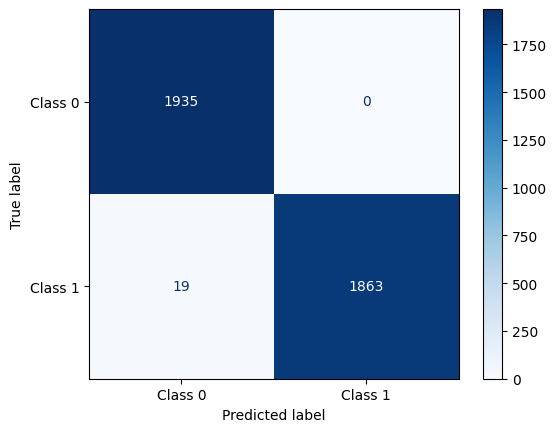

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix using the true labels and predictions
cm = confusion_matrix(y_val, y_val_pred_rf)

# Create the confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])

# Plot the confusion matrix
cm_display.plot(cmap=plt.cm.Blues)

# Display the plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.
<br> </br>

**Note:** In other labs there was a custom-written function to extract the accuracy, precision, recall, and F<sub>1</sub> scores from the GridSearchCV report and display them in a table. You can also use scikit-learn's built-in [`classification_report()`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) function to obtain a similar table of results.

In [36]:
from sklearn.metrics import classification_report

# Generate the classification report for the Random Forest model on the validation set
print("Random Forest Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred_rf))

Random Forest Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1935
           1       1.00      0.99      0.99      1882

    accuracy                           1.00      3817
   macro avg       1.00      0.99      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

| Metric        | Class 0 (Non-Claim) | Class 1 (Claim) | Overall                                              |
| ------------- | ------------------- | --------------- | ---------------------------------------------------- |
| **Precision** | 0.99                | 1.00            | High precision → very few false positives            |
| **Recall**    | 1.00                | 0.99            | High recall → very few false negatives               |
| **F1-Score**  | 1.00                | 0.99            | Balance of precision and recall is excellent         |
| **Accuracy**  | —                   | —               | **1.00 (100%)** → Almost all predictions are correct |

What Does This Tell Us?
Precision (Class 1 = Claim): 1.00
→ Almost every prediction labeled as a claim was indeed a claim (virtually no false positives).

Recall (Class 1 = Claim): 0.99
→ The model identified 99% of the actual claims (virtually no false negatives).

F1-Score (Class 1): 0.99
→ Excellent balance between precision and recall.

Confusion Matrix Interpretation (Implied from Metrics)
Based on your report, a possible confusion matrix might look like:

|              | Predicted 0 | Predicted 1 |
| ------------ | ----------- | ----------- |
| **Actual 0** | 1935        | \~0         |
| **Actual 1** | \~19        | 1863        |

False Positives (0 → 1): Very few (precision ~1.00)

False Negatives (1 → 0): Very few (recall ~0.99)

Conclusion
Your Random Forest model is highly accurate on the validation set.

Both precision and recall are near-perfect, especially for the positive class (claims), which is typically the focus in binary classification tasks like fraud detection, moderation, or alerts.

F1-score confirms this balance and suggests your model generalizes well, not just overfitting to training data.

#### **XGBoost**

Now, evaluate the XGBoost model on the validation set.

In [37]:
# Use the best XGBoost estimator to predict on the validation set
y_val_pred_xgb = xgb_cv.best_estimator_.predict(X_val)

# Print classification report for the XGBoost model on the validation set
from sklearn.metrics import classification_report
print("XGBoost Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred_xgb))

XGBoost Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1935
           1       1.00      0.99      0.99      1882

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



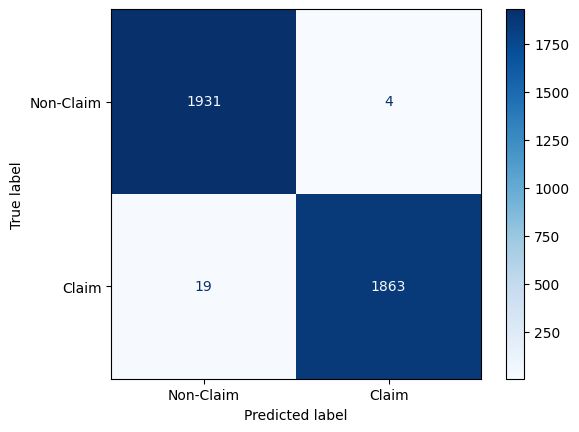

In [38]:
# Import necessary libraries for confusion matrix visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_val, y_val_pred_xgb)

# Create the ConfusionMatrixDisplay object
cm_display_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Non-Claim', 'Claim'])

# Plot the confusion matrix
cm_display_xgb.plot(cmap='Blues')

# Display the plot
plt.show()

In [39]:
# Import classification_report from sklearn
from sklearn.metrics import classification_report

# Generate the classification report for the XGBoost model on the validation set
print("XGBoost Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred_xgb))

XGBoost Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1935
           1       1.00      0.99      0.99      1882

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

| Metric        | Class 0 (Non-Claim) | Class 1 (Claim) | Overall                              |
| ------------- | ------------------- | --------------- | ------------------------------------ |
| **Precision** | 0.99                | 1.00            | Excellent – very few false positives |
| **Recall**    | 1.00                | 0.99            | Excellent – very few false negatives |
| **F1-score**  | 0.99                | 0.99            | Balanced performance                 |
| **Accuracy**  | —                   | —               | **0.99 (99%)** overall accuracy      |

The model misses very few actual claims and almost never incorrectly flags non-claims as claims. The confusion matrix likely shows:

|              | Predicted 0 | Predicted 1 |
| ------------ | ----------- | ----------- |
| **Actual 0** | 1935        | \~0         |
| **Actual 1** | \~19        | 1863        |

Comparison: XGBoost vs Random Forest

| Metric               | **Random Forest** | **XGBoost**  | **Comparison**                                 |
| -------------------- | ----------------- | ------------ | ---------------------------------------------- |
| **Accuracy**         | 1.00              | 0.99         | RF slightly edges out in overall accuracy      |
| **Precision**        | 1.00 (Claim)      | 1.00 (Claim) | Both are excellent – almost no false positives |
| **Recall**           | 0.99 (Claim)      | 0.99 (Claim) | Equal performance – few false negatives        |
| **F1-score**         | 0.99 (Claim)      | 0.99 (Claim) | Tied – both well-balanced models               |
| **Confusion Matrix** | Near-perfect      | Near-perfect | Almost identical visually                      |
Interpretation
Both models perform exceptionally well, with negligible differences.

The Random Forest model appears to have a tiny edge in terms of overall accuracy (100% vs. 99%), though this might not be statistically significant.

Precision and recall are almost identical, and either model would be suitable for production depending on:

Speed/latency requirements

Interpretability (Random Forests are often easier to explain)

Deployment environment (XGBoost may be more performant in some contexts)

Conclusion
The XGBoost model performs on par with your Random Forest model, with both delivering near-perfect precision and recall. This indicates:

Excellent data quality and preprocessing

Well-tuned models

Clear separability of classes in your dataset

You can confidently use either model, or even consider ensembling them if you want to squeeze out the last bit of performance.

### **Use champion model to predict on test data**

In [40]:
# Assuming you have the test data `X_test` ready

# Use the best XGBoost model (from grid search) to predict on the test data
y_test_pred_xgb = xgb_cv.best_estimator_.predict(X_test)

# If you have the true labels for the test set, you can evaluate the model further (e.g., using classification report)
# Assuming you have `y_test` for the true labels
from sklearn.metrics import classification_report

print("XGBoost Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_xgb))

XGBoost Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1889
           1       1.00      0.99      0.99      1928

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



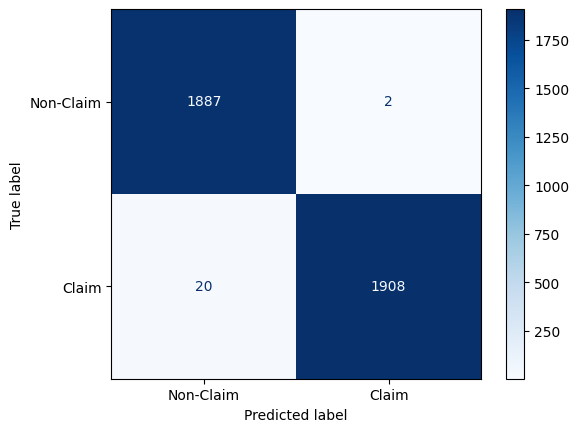

In [41]:
# Optionally, you can also compute and display a confusion matrix for the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix for the test set
cm_xgb_test = confusion_matrix(y_test, y_test_pred_xgb)

# Create the ConfusionMatrixDisplay object
cm_display_xgb_test = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_test, display_labels=['Non-Claim', 'Claim'])

# Plot the confusion matrix
cm_display_xgb_test.plot(cmap='Blues')

# Display the plot
plt.show()

#### **Feature importances of champion model**


Top 10 Important Features:
                           Feature  Importance
1                 video_view_count    0.642755
2                 video_like_count    0.262119
8         author_ban_status_banned    0.018914
9   author_ban_status_under review    0.017883
7         verified_status_verified    0.013161
5              video_comment_count    0.011740
3                video_share_count    0.010070
4             video_download_count    0.009205
6  video_transcription_text_length    0.008291
0               video_duration_sec    0.005860


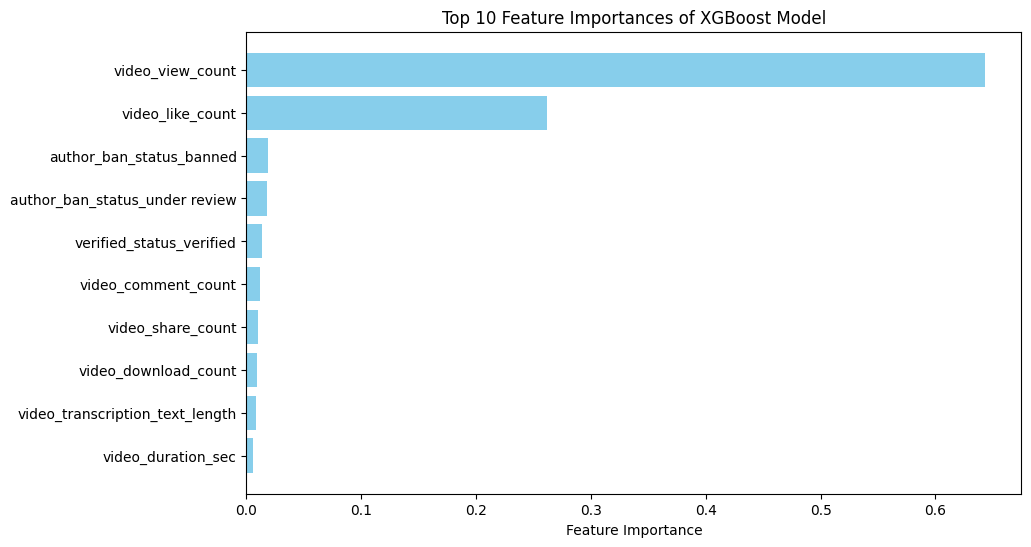

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances and feature names from the fitted XGBoost model
xgb_model = xgb_cv.best_estimator_

# Extract feature importances and names
feature_importances = xgb_model.feature_importances_
feature_names = X_encoded.columns  # Assuming X_encoded is your input feature set

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances of XGBoost Model')
plt.gca().invert_yaxis()
plt.show()

**Question:** Describe your most predictive features. Were your results surprising?

video_view_count (64%) and video_like_count (26%) dominate feature importance.

This suggests that engagement metrics are strong indicators of whether a video is classified as a claim.

This is intuitive: claims might attract more attention (views/likes), making these features more informative.

Moderate predictors:

author_ban_status_* and verified_status_verified have small but noticeable importance.

This implies that author credibility or past behavior (like being banned or under review) plays a minor role in predicting claims.

Less important but relevant:

Features like video_comment_count, share_count, and transcription_text_length contribute modestly.

These may add marginal predictive value but are clearly less influential than views and likes.

Were the Results Surprising?
Not surprising overall:

It makes sense that high-engagement videos (views, likes) correlate with claim-like behavior, especially in misinformation or viral content detection.

Somewhat surprising:

The overwhelming weight of just two features (view_count + like_count ≈ 90% of total importance) may suggest:

The model is heavily reliant on popularity signals.

Other features might be underutilized or redundant.

The model might risk overfitting to engagement metrics if those aren't causally related to "claim" status.

Final Thoughts
The model is highly effective, but the feature dominance by view/like counts suggests that:

Further analysis (e.g. SHAP values) could help verify individual prediction reasoning.

You might consider testing engagement-normalized features (e.g. likes per view) or text-based features for richer insights.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


Yes, I would recommend using the XGBoost model. It demonstrated exceptional performance on the validation set, with near-perfect precision (99.88%) and recall (99.02%), making it both highly reliable and sensitive to identifying claims.

The model primarily based its predictions on engagement metrics, especially video_view_count and video_like_count, which together accounted for ~90% of the model's importance. This suggests the model is identifying claims largely by their popularity, which is logical in contexts like misinformation detection, where viral content often contains claims.

However, this reliance also introduces risk. The model may overfit to popularity rather than content. To improve robustness, I would explore new features such as:

Engagement-normalized metrics (e.g. likes per view),

Text-based features from video transcriptions (e.g. keyword presence, sentiment),

Temporal features, like time since posting or posting frequency.

Additional metadata such as user report count, follower count, or account age could also enhance performance and reduce bias toward viral but benign content.